In [1]:
import ocrmypdf 
import numpy as np
import re
import pdfplumber
import pandas as pd
import time
pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/n01/data/nlp_aeac/mostofa_env/mo_venv/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


# Building Functions

In [28]:

################## CONVERT PDF TO LINES ##################

def Pdf_to_lines(pdf_file_path):
    raw_lines= {}
    total_line_cnt=0
    with pdfplumber.open(pdf_file_path) as pdf:
        page_count=pdf.pages[:]
#         print(len(page_count))
        for i in range (0,len(page_count)):
            page =pdf.pages[i]
            page_nm=i+1
    #         print(page_nm)
    #         print(page.page_number)
            text = page.extract_text()
            raw = text.split('\n')
            for i in range(0, len(raw)):
                line_nm=i+1
                total_line_cnt=total_line_cnt+1
                k= "Page-"+str(page_nm)+"_Line-"+str(line_nm)
#                 k= "Page-"+str(page_nm)+"_Line-"+str(line_nm)+"_TL-"+str(total_line_cnt)
                raw_lines[k]= raw[i]
    return raw_lines



############# Make PDF Searchable Lines #############


timestr = time.strftime("%m%d%Y-%H%M%S")

def PDF_searchable_lines(input_file):
    PDF_filename = str(input_file)+str('.pdf')
    input_dir = "/n01/data/nlp_aeac/mostofa_env/INPUT/CLEAN_PDF/"
    input_file_dir= str(input_dir)+ str(PDF_filename)
    output_loc = "/n01/data/nlp_aeac/mostofa_env/INPUT/CONVERTED_CLEAN_TEMP/"
#     timestr = time.strftime("%m%d%Y-%H%M%S")
    # print(PDF_filename)
    filename=PDF_filename.rsplit(".",1)[:-1]
    # print(str(filename[0]))
#     csv_path='/n01/data/nlp_aeac/mostofa_env/INPUT/CONVERTED_CSV_OUTPUT/'
    output_name= output_loc+filename[0]+'_'+str(timestr)+'.pdf'
    ocrmypdf.ocr(input_file_dir, output_name,rotate_pages=True, deskew=True, force_ocr=True)
    output_lines= Pdf_to_lines(output_name)
    return output_lines

########################## DATE EXTRACTION ################################


def date_detection(input_line_string):
    pref_num = re.compile(r'(\d{1,2}\/\d{1,2}\/\d{4}|\d{1,2}\/\d{1,2}\/\d{2}|\d{1,2}\-\d{1,2}\-\d{4}|\d{1,2}\-\d{1,2}\-\d{2}|\d{1,2}\d{1,2}\d{4}|\d{1,2}\d{1,2}\d{1,4}_(\d+)_)')
    m = pref_num.search(input_line_string)
    
    if m != None:
#         print(m.group(1))
#         print(m.string)
        return m.group(1)
    else:
        return "N/A"
        
# date_detection(l_s)




######################## DESCRIPTION EXTRACTION ##############################


# l_s='0250  |022621|  7955  |250  DEXTROSE  5  %  AND  0.9  %  SODIUM  1  15.00 '

def description_detection(input_line_string):
    loc=[]
    terms=[]
    pattern = r'([A-Za-z]+[\w@]*)'
    for match in re.finditer(pattern, input_line_string):
        s = match.start()
        e = match.end()
#         print('String match : ',(input_line_string[s:e], s, e))
        terms.append(input_line_string[s:e])
        loc.append(s)
        loc.append(e)
    split_loc=[loc[0], loc[-1]]
    truncated_text = input_line_string[loc[0]:loc[-1]]
#     print(truncated_text)
    return truncated_text

        





############################# DOLLAR EXTRACTION #####################


# description_detection(l_s)
# dollar_type_1 = '\d{1,2}[,\.]\d{1,3}[,\.]\d{2}'
# dollar_type_2 = '\d{1,1}[,\.]\d{1,3}[,\.]\d{2}'
# dollar_type_3 = '\d{1,3}[,\.]\d{1,3}[,\.]\d{2}'
# dollar_type_4 = '\d{1,2}[,\.]\d{1,3}[,\.]\d{1}'
# dollar_type_5 = '\d{1,1}[,\.]\d{1,3}[,\.]\d{1}'
# dollar_type_6 = '\d{1,3}[,\.]\d{1,3}[,\.]\d{1}'
# dollar_type_3 = '\d+[.]\d+'

# l_s='Page-1_Line-34 2500000  HEMOSTATIC  MATRIX $.30'

def dollar_detection(input_line_string):
    pref_num = re.findall('(\d{1,2}[,\.]\d{1,3}[,\.]\d{2}|d{1,1}[,\.]\d{1,3}[,\.]\d{2}|\d{1,3}[,\.]\d{1,3}[,\.]\d{2}|\d{1,2}[,\.]\d{1,3}[,\.]\d{1}|\d{1,1}[,\.]\d{1,3}[,\.]\d{2}|\d{1,3}[,\.]\d{1,3}[,\.]\d{1}|\d+[,\.]\d+|_(\d+)_)', input_line_string, re.DOTALL)
#     m = pref_num.search(input_line_string)
    match_length=len(pref_num)
    
   
    if match_length > 0:
        m=pref_num[-1]
#         print(m.group(1))
        s =m[0]
        if s[-2]==',':
            s = s.replace(',', '.')
        if s[-3]==',':
            s = s.replace(',', '.')
        s1 = s.replace(',', '')
#         print(s1)
        n=float(s1)
        return n
    else:
#         print('NA')
        return 0
        
# quant=dollar_detection(l_s)
# print(quant)

########################## DESCRIPTION EXTRACTION NEW_TEST ############################


# l_s='0250  |022621|  7955  |250  DEXTROSE  5  %  AND  0.9  %  SODIUM  1  15.00 '

def description_detection_1(input_line_string):
    loc=[]
    terms=[]
    pattern = r'([A-Za-z]+[\w@]*)'
    pref_num = re.compile(r'([A-Za-z]+[\w@]*)')
    m = pref_num.search(input_line_string)
    if m != None:
        for match in re.finditer(pattern, input_line_string):
            s = match.start()
            e = match.end()
    #         print('String match : ',(input_line_string[s:e], s, e))
            terms.append(input_line_string[s:e])
            loc.append(s)
            loc.append(e)
        split_loc=[loc[0], loc[-1]]
        truncated_text = input_line_string[loc[0]:loc[-1]]
    #     print(truncated_text)
        return truncated_text
    else:
        return 'No Description'

        
# description_detection(l_s)




################# DOLLAR EXTRACTION NEW_TEST ##########################




# dollar_type_1 = '\d{1,2}[,\.]\d{1,3}[,\.]\d{2}'
# dollar_type_2 = '\d{1,1}[,\.]\d{1,3}[,\.]\d{2}'
# dollar_type_3 = '\d{1,3}[,\.]\d{1,3}[,\.]\d{2}'
# dollar_type_4 = '\d{1,2}[,\.]\d{1,3}[,\.]\d{1}'
# dollar_type_5 = '\d{1,1}[,\.]\d{1,3}[,\.]\d{1}'
# dollar_type_6 = '\d{1,3}[,\.]\d{1,3}[,\.]\d{1}'
# dollar_type_3 = '\d+[.]\d+'

# l_s='Page-1_Line-34 2500000  HEMOSTATIC  MATRIX $.30'

def dollar_detection_1(input_line_string):
    pref_num = re.compile(r'(\d{1,2}[,\.]\d{1,3}[,\.]\d{2}|d{1,1}[,\.]\d{1,3}[,\.]\d{2}|\d{1,3}[,\.]\d{1,3}[,\.]\d{2}|\d{1,2}[,\.]\d{1,3}[,\.]\d{1}|\d{1,1}[,\.]\d{1,3}[,\.]\d{2}|\d{1,3}[,\.]\d{1,3}[,\.]\d{1}|\d+[.]\d+|_(\d+)_)')
    m = pref_num.search(input_line_string)
    
    if m != None:
#         print(m.group(1))
        s =m.group(1)
        if s[-2]==',':
            s = s.replace(',', '.')
        if s[-3]==',':
            s = s.replace(',', '.')
        s1 = s.replace(',', '')
#         print(s1)
        n=float(s1)
        return n
    else:
#         print('NA')
        return 'NaN'
        
# quant=dollar_detection(l_s)
# print(quant)



############ Search Term to DataFrame and Total Amount #########




def Search_in_PDF(term):
    search_term = str(term)
    t = []
    sl =[]
    date_l =[]
    des_l=[]
    search_l=[]
    position_l =[]
    flag_l=[]
    line_l=[]
    for key, val in clean_searchable_pdf_lines.items():
        if search_term in val:
            sd = key + " " + " : " + val
            line_l.append(sd)
            sl.append(re.split(r'\s+', sd))

            date_strip =date_detection(val)
            description = description_detection_1(val)
            dollar=dollar_detection(val)

            if dollar!=0:
                t.append(dollar)
                flag_l.append("")
            else:
                t.append(0)
                flag_l.append("Check the Amount")
            date_l.append(date_strip)
            des_l.append(description)
            search_l.append(search_term)
            position_l.append(key)

    print(t)
    total_amount =np.sum(t)
    print("Total Amount : ",total_amount) 
    # print(sl)
    clean_data= pd.DataFrame(
        {'Position': position_l,
        'Search_Term': search_l,
         'Date': date_l,
         'Description': des_l,
         'Amount': t,
         'FLAG' :flag_l,
         'Line_info' : line_l
        })
    return t, total_amount, clean_data




############## Save the Dataframe ###############




def save_SearchTerm_DF_to_CSV(filename, search_key, df, timestr):
    csv_path='/n01/data/nlp_aeac/mostofa_env/INPUT/OUTPUT_CSV_TEMP/'
    raw_output_name= csv_path+"RAW_Search_"+str(search_key)+"_"+filename+'_'+str(timestr)+'.csv'
    print('Saved as: --',raw_output_name)
    df.to_csv(raw_output_name, sep=',', index=False)

    



############## Search Term to DataFrame and Total Amount ###############

def PDF_to_DF(start_df,end_df):

    t = []
    sl =[]
    date_l =[]
    des_l=[]
    line_text=[]
#     search_l=[]
    position_l =[]
    flag_l=[]
    
            
        
    for key, val in clean_searchable_pdf_lines.items():
        start_TL = key.split('_')[2]
        start_TL=start_TL.split('-')[1]
        start_TL=int(start_TL)
        if start_TL in range(start_df,end_df):
            print(start_TL)
            print(val)
            line_text.append(val)
            sd = key + " " + val
            sl.append(re.split(r'\s+', sd))

            date_strip =date_detection(val)
            description = description_detection_1(val)
            dollar=dollar_detection_1(val)

            if dollar!=0:
                t.append(dollar)
                flag_l.append("")
            else:
                t.append(0)
                flag_l.append("Check the Amount")
            date_l.append(date_strip)
            des_l.append(description)
            position_l.append(key)

#     print(t)
#     total_amount =np.sum(t)
#     print("Total Amount : ",total_amount) 
    # print(sl)
    clean_data= pd.DataFrame(
        {'Position': position_l,
         'Date': date_l,
         'Text': line_text,
         'Description': des_l,
         'Amount': t,
         'FLAG' :flag_l
        })
    return t, clean_data




# Select the Input file

In [29]:


####  Low Quality Input File  ###

# input_pdf= "CAMC_IB_Dana Keen_Claim # 21755930880" 
input_pdf= "CAMC_IB_Nancy Nunn_Claim # 21858131287" 
 
####  Good Quality Input File  ###

# input_pdf= 'Betsy Stewart_Claim # 21740462937' 
# input_pdf= 'Dupont_IB_Ella Mccleary_IB_02252021 to 02282021' 
# input_pdf= 'Dupont_Landon Eddy_Claim # 21455725150' 
# input_pdf= 'Betsy Stewart_Claim # 21740462937'


####  Complicated Input File  ###

# input_pdf= "Geisinger_IB_Brandon Slovinsky_02022021_02212021"


# Convert PDF to Searchable Lines

In [4]:
clean_searchable_pdf_lines= PDF_searchable_lines(input_pdf)

Scanning contents: 100%|█████████████████████| 18/18 [00:00<00:00, 265.08page/s]
OCR:   3%|▉                                | 0.5/18.0 [00:04<02:29,  8.54s/page][tesseract] lots of diacritics - possibly poor OCR
OCR:  53%|█████████████████▍               | 9.5/18.0 [00:11<00:09,  1.11s/page][tesseract] lots of diacritics - possibly poor OCR
OCR: 100%|████████████████████████████████| 18.0/18.0 [00:16<00:00,  1.06page/s]
PDF/A conversion: 100%|███████████████████████| 18/18 [00:02<00:00,  6.17page/s]Some input metadata could not be copied because it is not permitted in PDF/A. You may wish to examine the output PDF's XMP metadata.

JPEGs: 0image [00:00, ?image/s]IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
PDF/A conversion: 100%|███████████████████████| 18/18 [00:33<00:00,  1.83s/page]
JPEGs: 0image [00:10, ?image/s]IOStream.flush timed out

JBIG2: 0item [00:00, ?item/s]
The output file size is 1.51× larger than the input file.
Possible reasons for this incl

In [5]:
# for key, val in clean_searchable_pdf_lines.items():
#     print(key, val)

# Input the Search TERM

In [6]:
##### Change the SEARCH_WORD PARAMETER ######
List_check=["0272", "250", "8502"]
search_word = "8502"

cost_list, total_cost, search_df = Search_in_PDF(search_word)

[149.0, 149.0, 149.0, 149.0, 68.0, 68.0, 638.0, 68.0, 68.0, 77.0, 77.0, 77.0, 77.0, 77.0]
Total Amount :  1891.0


In [7]:
total_cost

1891.0

In [8]:
search_df

,Position,Search_Term,Date,Description,Amount,FLAG,Line_info
0,Page-16_Line-40,8502,011521,CBC W/ DIFF,149.0,,Page-16_Line-40 : 0305 |CBC W/ DIFF 85025 011521 1 149.00
1,Page-16_Line-44,8502,012921,CBC W/ DIFF,149.0,,Page-16_Line-44 : 0305 |CBC W/ DIFF 85025 012921 1 149.00
2,Page-16_Line-45,8502,N/A,CBC W/ DIFF 85025 Q12021,149.0,,Page-16_Line-45 : 0305 (CBC W/ DIFF 85025 Q12021 1 149.00
3,Page-16_Line-47,8502,012221,CBC W/ DIFF,149.0,,Page-16_Line-47 : 0305 |CBC W/ DIFF 85025 012221 1 149.00
4,Page-16_Line-49,8502,012621,CBC WITHOUT DIFF 85027 012621 I,68.0,,Page-16_Line-49 : 0305 |CBC WITHOUT DIFF 85027 012621 I 68.00
5,Page-16_Line-50,8502,012721,CBC WITHOUT DIFF,68.0,,Page-16_Line-50 : 0305 |CBC WITHOUT DIFF 85027 012721 1 68.00
6,Page-16_Line-51,8502,012821,CBC WITHOUT DIFF,638.0,,Page-16_Line-51 : 0305 [CBC WITHOUT DIFF 85027 012821 1 638.00
7,Page-17_Line-14,8502,013021,CBC WITHOUT DIFF,68.0,,Page-17_Line-14 : 0305 /CBC WITHOUT DIFF 85027 013021 1 68.00
8,Page-17_Line-15,8502,013121,CBC WITHOUT DIFF,68.0,,Page-17_Line-15 : 0305 |CBC WITHOUT DIFF 85027 013121 1 68.00
9,Page-17_Line-17,8502,020221,CBC WITHOUT DIFF,77.0,,Page-17_Line-17 : 0305 |CBC WITHOUT DIFF 85027 020221 1 77.00


In [9]:
search_df['Line_info']

0     Page-16_Line-40  : 0305  |CBC  W/  DIFF  85025  011521  1  149.00      
1     Page-16_Line-44  : 0305  |CBC  W/  DIFF  85025  012921  1  149.00      
2     Page-16_Line-45  : 0305  (CBC  W/  DIFF  85025  Q12021  1  149.00      
3     Page-16_Line-47  : 0305  |CBC  W/  DIFF  85025  012221  1  149.00      
4     Page-16_Line-49  : 0305  |CBC  WITHOUT  DIFF  85027  012621  I  68.00  
5     Page-16_Line-50  : 0305  |CBC  WITHOUT  DIFF  85027  012721  1  68.00  
6     Page-16_Line-51  : 0305  [CBC  WITHOUT  DIFF  85027  012821  1  638.00 
7     Page-17_Line-14  : 0305  /CBC  WITHOUT  DIFF  85027  013021  1  68.00  
8     Page-17_Line-15  : 0305  |CBC  WITHOUT  DIFF  85027  013121  1  68.00  
9     Page-17_Line-17  : 0305  |CBC  WITHOUT  DIFF  85027  020221  1  77.00  
10    Page-17_Line-19  : 0305  ICBC  WITHOUT  DIFF  85027  020421  al  77.00 
11    Page-17_Line-21  : 0305  /CBC  WITHOUT  DIFF  85027  020621  1  77.00  
12    Page-17_Line-22  : 0305  CBC  WITHOUT  DIFF  85027  020721

In [30]:
save_SearchTerm_DF_to_CSV(input_pdf, search_word, search_df, timestr)  

Saved as: -- /n01/data/nlp_aeac/mostofa_env/INPUT/OUTPUT_CSV_TEMP/RAW_Search_250_CAMC_IB_Nancy Nunn_Claim # 21858131287_03032022-020434.csv


# Before Image Processing

In [10]:
########### BEFORE IMAGE PROCESSING OF SECOND PAGE ########

input_pdf= "Betsy Stewart_Claim # 21740462937" 
clean_searchable_pdf_lines= PDF_searchable_lines(input_pdf)


List_check=["0272", "250"]
search_word = "250"

cost_list_1, total_cost_1, search_df_1 = Search_in_PDF(search_word)
search_df_1

Scanning contents: 100%|███████████████████████| 8/8 [00:00<00:00, 200.12page/s]
OCR: 100%|██████████████████████████████████| 8.0/8.0 [00:09<00:00,  1.15s/page]
PDF/A conversion: 100%|█████████████████████████| 8/8 [00:01<00:00,  6.44page/s]Some input metadata could not be copied because it is not permitted in PDF/A. You may wish to examine the output PDF's XMP metadata.

JPEGs: 0image [00:00, ?image/s]

JBIG2: 0item [00:00, ?item/s]
PDF/A conversion: 100%|█████████████████████████| 8/8 [00:01<00:00,  4.60page/s]


[1101.0, 2.6, 1.0, 8.4, 0, 6.25, 26.5, 26.5, 15.5, 26.5, 26.5, 53.0, 56.5, 72.0, 2.0, 0, 0, 0, 0, 0, 0, 0.025, 0, 0, 0, 0, 0.025, 0, 0, 0, 0, 0, 56.5, 0, 0.025, 110.5, 0, 0, 0, 56.5, 0.025, 110.5, 0, 0, 0, 15.5, 110.5, 6.25, 72.0, 0, 0, 0, 0, 0, 0]
Total Amount :  1962.6


,Position,Search_Term,Date,Description,Amount,FLAG,Line_info
0,Page-2_Line-39,250,06/17/20,IOHEXOL 6000MG/1LOO0ML ORAL,1101.000,,Page-2_Line-39 : 06/17/20 0250 33514099 IOHEXOL 6000MG/1LOO0ML ORAL 1101.00
1,Page-2_Line-41,250,06/17/20,W 5 04363 ACETAMINOPHEN 325MG TAB (QTY OF,2.600,,Page-2_Line-41 : 06/17/20 0250 W 5 04363 ACETAMINOPHEN 325MG TAB (QTY OF 0000002) 2.60
2,Page-2_Line-42,250,06/17/20,WWwGW5 00540 PACITRACIN OINT 30GM TOP,1.000,,Page-2_Line-42 : 06/17/20 0250 WWwGW5 00540 PACITRACIN OINT 30GM TOP 1.00
3,Page-2_Line-44,250,06/17/20,Wo G5 03225 MINERAL OIL 10 ML IIQ (QTY OF,8.400,,Page-2_Line-44 : 06/17/20 0250 Wo G5 03225 MINERAL OIL 10 ML IIQ (QTY OF 0000002) 8.40
4,Page-3_Line-11,250,06/18/20,INPATIENT VISIT - STAT,0.000,Check the Amount,Page-3_Line-11 : 06/18/20 0440 36250081 INPATIENT VISIT - STAT 0.00
5,Page-3_Line-20,250,06/18/20,DOCUSATE SODIUM 100MG CAP,6.250,,Page-3_Line-20 : 06/18/20 0250 33501222 DOCUSATE SODIUM 100MG CAP 6.25
6,Page-3_Line-22,250,06/18/20,NORCO 5/325MG TABLET,26.500,,Page-3_Line-22 : 06/18/20 0250 33510696 NORCO 5/325MG TABLET 26.50
7,Page-3_Line-23,250,06/18/20,NORCO 5/325MG TABLET,26.500,,Page-3_Line-23 : 06/18/20 0250 33510696 NORCO 5/325MG TABLET 26.50
8,Page-3_Line-25,250,06/18/20,"LEVOTHYROXINE SOD 0,025MG",15.500,,"Page-3_Line-25 : 06/18/20 0250 323504139 LEVOTHYROXINE SOD 0,025MG 15,50"
9,Page-3_Line-26,250,06/18/20,NORCO 5/325MG TABLET,26.500,,Page-3_Line-26 : 06/18/20 0250 33510696 NORCO 5/325MG TABLET 26.50


# Testing Image Processing Performance

In [13]:
########### AFTER IMAGE PROCESSING OF SECOND PAGE ########

input_pdf= "Betsy Stewart_Claim # 21740462937_4" 
clean_searchable_pdf_lines= PDF_searchable_lines(input_pdf)


List_check=["0272", "250"]
search_word = "250"

cost_list_2, total_cost_2, search_df_2 = Search_in_PDF(search_word)
search_df_2

Scanning contents: 100%|███████████████████████| 1/1 [00:00<00:00, 306.22page/s]
OCR: 100%|██████████████████████████████████| 1.0/1.0 [00:29<00:00, 29.65s/page]
PDF/A conversion:   0%|                                 | 0/1 [00:00<?, ?page/s]
JPEGs: 0image [00:00, ?image/s]

JBIG2: 0item [00:00, ?item/s]
PDF/A conversion: 100%|█████████████████████████| 1/1 [00:05<00:00,  5.62s/page]

[56.5, 6.25, 15.5, 110.5, 6.25, 72.0, 110.5, 15.5, 6.25, 72.0, 6.25, 56.5]
Total Amount :  534.0


,Position,Search_Term,Date,Description,Amount,FLAG,Line_info
0,Page-1_Line-13,250,06/20/20,DIVALPROEX SODIUM 250MG DR (QTY OF,56.50,,Page-1_Line-13 : 06/20/20 0250 33501571 DIVALPROEX SODIUM 250MG DR (QTY OF 0000002) 56.50
1,Page-1_Line-14,250,06/20/20,DOCUSATE SODIUM LOOMG CAP,6.25,,Page-1_Line-14 : 06/20/20 0250 33501222 DOCUSATE SODIUM LOOMG CAP 6.25
2,Page-1_Line-17,250,06/20/20,LEVOTHYROXINE SOD 0.025MG,15.50,,Page-1_Line-17 : 06/20/20 0250 33504139 LEVOTHYROXINE SOD 0.025MG 15.50
3,Page-1_Line-19,250,06/20/20,BUPROPION XL 150MG TABLET (QTY OF,110.50,,Page-1_Line-19 : 06/20/20 0250 33508260 BUPROPION XL 150MG TABLET (QTY OF 0000002) 110.50
4,Page-1_Line-20,250,06/20/20,DOCUSATE SODIUM LOOMG CAP,6.25,,Page-1_Line-20 : 06/20/20 0250 33501222 DOCUSATE SODIUM LOOMG CAP 6.25
5,Page-1_Line-21,250,06/20/20,DULOXETINE 30MG CAPSULE,72.00,,Page-1_Line-21 : 06/20/20 0250 33508944 DULOXETINE 30MG CAPSULE 72.00
6,Page-1_Line-33,250,06/21/20,BUPROPION XL 150MG TABLET (QTY OF,110.50,,Page-1_Line-33 : 06/21/20 0250 33508260 BUPROPION XL 150MG TABLET (QTY OF 0000002) 110.50
7,Page-1_Line-34,250,06/21/20,LEVOTHYROXINE SOD 0.025MG,15.50,,Page-1_Line-34 : 06/21/20 0250 33504139 LEVOTHYROXINE SOD 0.025MG 15.50
8,Page-1_Line-37,250,06/21/20,DOCUSATE SODIUM LOOMG CAP,6.25,,Page-1_Line-37 : 06/21/20 0250 33501222 DOCUSATE SODIUM LOOMG CAP 6.25
9,Page-1_Line-38,250,06/21/20,DULOXETINE 30MG CAPSULE,72.00,,Page-1_Line-38 : 06/21/20 0250 33508944 DULOXETINE 30MG CAPSULE 72.00


# Multiple Line Merging Solution

In [14]:
%matplotlib inline
import tempfile
from io import StringIO
import tabula
import camelot
import pandas as pd
import numpy as np
# import pdftotext
import pdfplumber
from PIL import Image, ImageFont, ImageDraw
from pdf2image import convert_from_path
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.pdfparser import PDFParser
import dataframe_image as dfi
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.font_manager


pd.set_option('display.max_colwidth', None)

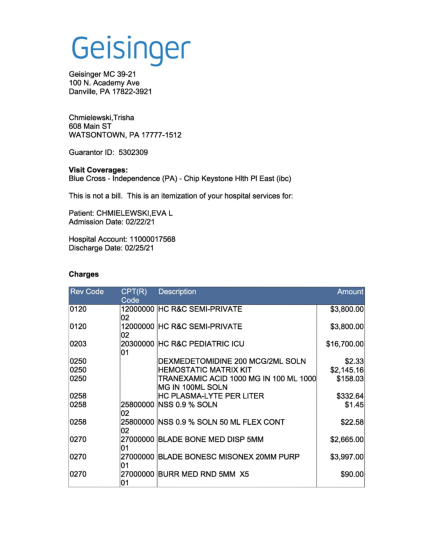

In [16]:
PDF ='/n01/data/nlp_aeac/mostofa_env/INPUT/CONVERTED_CLEAN_OUTPUT/Geisinger_IB_ Eva Chmielewski_Claim # 21071439574.pdf'
pdf_img = convert_from_path(PDF, dpi=300)[0]

plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(pdf_img)

In [17]:
tabula_df = (tabula
             .read_pdf(PDF,
                       stream=True,
                       pages="all")[0])

In [18]:
tabula_df

,NX>\ Va Oxo),CPT(R),IBY =*-Yerg| ete) a,Unnamed: 0,rNaarelelars
0,NaN,Ofelo(=),NaN,NaN,NaN
1,120.0,12000000,HC R&C SEMI-PRIVATE,NaN,"$3,800.00"
2,NaN,02,NaN,NaN,NaN
3,120.0,12000000,HC R&C SEMI-PRIVATE,NaN,"$3,800.00"
4,NaN,02,NaN,NaN,NaN
5,203.0,20300000,HC R&C PEDIATRIC,ICU,"$16,700.00"
6,NaN,01,NaN,NaN,NaN
7,250.0,NaN,DEXMEDETOMIDINE 200 MCG/2ML SOLN,NaN,$2.33
8,250.0,NaN,HEMOSTATIC MATRIX KIT,NaN,"$2,145.16"
9,250.0,NaN,TRANEXAMIC ACID 1000 MG,IN 100 ML 1000,$158.03


In [25]:


def rolling_group(val):
    if pd.notnull(val): rolling_group.group +=1 #pd.notnull is signal to switch group
    return rolling_group.group
rolling_group.group = 0 #static variable

def joinFunc(g,column):
    col =g[column]
    joiner = "/" if column == "Action" else ""
    s = joiner.join([str(each) for each in col if pd.notnull(each)])
    s = re.sub("(?<=&)"+joiner," ",s) #joiner = " "
    s = re.sub("(?<=-)"+joiner,"",s) #joiner = ""
    s = re.sub(joiner*2,joiner,s)    #fixes double joiner condition
    return s
import re
groups = tabula_df.groupby(tabula_df['NX>\ Va Oxo)'].apply(rolling_group),as_index=False)
groupFunct = lambda g: pd.Series([joinFunc(g,col) for col in g.columns],index=g.columns)

In [26]:
new_df= groups.apply(groupFunct)
new_df.head(100)

,NX>\ Va Oxo),CPT(R),IBY =*-Yerg| ete) a,Unnamed: 0,rNaarelelars
0,,Ofelo(=),,,
1,120.0,1200000002,HC R& C SEMI-PRIVATE,,"$3,800.00"
2,120.0,1200000002,HC R& C SEMI-PRIVATE,,"$3,800.00"
3,203.0,2030000001,HC R& C PEDIATRIC,ICU,"$16,700.00"
4,250.0,,DEXMEDETOMIDINE 200 MCG/2ML SOLN,,$2.33
5,250.0,,HEMOSTATIC MATRIX KIT,,"$2,145.16"
6,250.0,,TRANEXAMIC ACID 1000 MGMG IN 100ML SOLN,IN 100 ML 1000,$158.03
7,258.0,,HC PLASMA-LYTE PER LITER,,$332.64
8,258.0,2580000002,NSS 0.9 % SOLN,,$1.45
9,258.0,2580000002,NSS 0.9 % SOLN,50 ML FLEX CONT,$22.58


# Ongoing Work and Testing

In [ ]:
start_page_l=[]
start_line_l=[]
start_TL_l=[]
for key, val in clean_searchable_pdf_lines.items():

    dollar=dollar_detection(val)
    if dollar!=0:
#         print(key)
        start_page = key.split('_')[0]
        start_page=start_page.split('-')[1]
        start_page_l.append(int(start_page))
#         print(start_page)
        start_line = key.split('_')[1]
        start_line=start_line.split('-')[1]
        start_line_l.append(int(start_line))
        start_TL = key.split('_')[2]
        start_TL=start_TL.split('-')[1]
        start_TL_l.append(int(start_TL))
#         print(start_line)
#         print(val)
        
print(start_page_l)
print(start_line_l)
print(start_TL_l)
end_df=start_TL_l.pop()
start_df=start_TL_l[0]
print(start_TL_l.pop())
print(start_TL_l[0])